In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Read in the dataset
ufo = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/ufo.csv')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [3]:
# Read in the dataset
ufo = pd.read_csv('../data/ufo2.csv')
ufo.columns

Index(['Unnamed: 0', 'City', 'Colors Reported', 'Shape Reported', 'State',
       'Time', 'Date', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'weekday_name', 'weekday_cats', 'sightings'],
      dtype='object')

In [4]:
# Read in the dataset
filepath=Path.joinpath(Path.cwd().parent, 'data', 'ufo2.csv')
print(filepath)

/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/ufo2.csv


In [5]:
ufo = pd.read_csv(filepath)
ufo.columns

Index(['Unnamed: 0', 'City', 'Colors Reported', 'Shape Reported', 'State',
       'Time', 'Date', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'weekday_name', 'weekday_cats', 'sightings'],
      dtype='object')

In [10]:
import os
allfiles = os.listdir('../data/')
allfiles[:5]

['autoMPG.csv',
 'avocado.csv',
 'beer.txt',
 'boston_housing_data.csv',
 'chipotle.tsv']

In [11]:
for file in allfiles:
    filepath=Path.joinpath(Path.cwd().parent, 'data', file)
    print(filepath)

/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/autoMPG.csv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/avocado.csv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/beer.txt
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/boston_housing_data.csv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/chipotle.tsv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/chocolate_ratings.csv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/cleveland_heart_data.csv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/country-codes.csv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/customers.csv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/drinks.csv
/home/studio-lab-user/intuit-ga-dat17/lectures/04-data-visualization/data/eu-govt-bonds-cleaned.csv


## With plotly

How to run plotly in a colab notebook:

https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

how to embed plotly in medium: https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b

In [12]:
import plotly
import plotly.graph_objs as go

In [16]:
ufo['Time'].dtypes

dtype('O')

In [17]:
# create new variables!
ufo['Time'] = pd.to_datetime(ufo['Time'], infer_datetime_format=True)
ufo['Date'] = ufo['Time'].dt.date

In [18]:
# Create some additional variables
ufo['Year']=ufo['Time'].dt.year 
ufo['Month']=ufo['Time'].dt.month 
ufo['Day']=ufo['Time'].dt.day 
ufo['Hour']=ufo['Time'].dt.hour 
ufo['Weekday']=ufo['Time'].dt.weekday 
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Date,Year,Month,Day,Hour,Weekday
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933-04-18,1933,4,18,19,1


In [19]:
ufo['Colors Reported'].value_counts()

ORANGE                          5216
RED                             4809
GREEN                           1897
BLUE                            1855
YELLOW                           842
RED ORANGE                       486
RED GREEN                        469
RED BLUE                         445
RED GREEN BLUE                   166
GREEN BLUE                       147
RED YELLOW                       146
ORANGE YELLOW                    137
ORANGE GREEN                      66
ORANGE BLUE                       58
YELLOW GREEN                      53
RED YELLOW BLUE                   36
RED YELLOW GREEN                  35
RED ORANGE YELLOW                 32
YELLOW BLUE                       27
RED YELLOW GREEN BLUE             26
RED ORANGE BLUE                   21
ORANGE GREEN BLUE                 13
YELLOW GREEN BLUE                 13
RED ORANGE GREEN                  12
RED ORANGE GREEN BLUE              8
ORANGE YELLOW GREEN                5
RED ORANGE YELLOW GREEN            4
O

In [23]:
# we can create a new variable with only 4 categories.
ufo['color']='other'
ufo.loc[ufo['Colors Reported']=='ORANGE', 'color']='orange'
ufo.loc[ufo['Colors Reported']=='RED', 'color']='red'
ufo.loc[ufo['Colors Reported']=='GREEN', 'color']='green'
ufo['color'].value_counts()

other     68621
orange     5216
red        4809
green      1897
Name: color, dtype: int64

In [25]:
ufo[ufo['color']=='orange'].head()

,City,Colors Reported,Shape Reported,State,Time,Date,Year,Month,Day,Hour,Weekday,color
111,Tarrant City,ORANGE,CIRCLE,AL,1949-08-15 22:00:00,1949-08-15,1949,8,15,22,0,orange
138,Coeur d'Alene,ORANGE,CIGAR,ID,1950-07-02 13:00:00,1950-07-02,1950,7,2,13,6,orange
174,Greenville,ORANGE,TRIANGLE,TX,1952-04-15 16:00:00,1952-04-15,1952,4,15,16,1,orange
249,Artesia,ORANGE,OTHER,NM,1953-08-15 19:00:00,1953-08-15,1953,8,15,19,5,orange
311,Red Bank,ORANGE,CIRCLE,NJ,1954-12-15 23:10:00,1954-12-15,1954,12,15,23,2,orange


In [26]:
# Create a new dataset by collapsing the original dataframe on color and date
ufo['sighting']=1
dates = ufo.groupby(['Year', 'color'])['sighting'].sum()
dates

Year  color 
1930  other        2
1931  other        2
1933  other        1
1934  other        1
1935  other        1
                ... 
2013  red        590
2014  green      110
      orange     736
      other     4045
      red        491
Name: sighting, Length: 269, dtype: int64

In [27]:
# simple example
color_sightings = ufo.groupby(['color'])['sighting'].sum()
color_sightings

color
green      1897
orange     5216
other     68621
red        4809
Name: sighting, dtype: int64

In [37]:
# simple example
city_sightings = ufo.groupby(['City'])['sighting'].sum()
city_sightings.sort_values(ascending=False).head()

City
Seattle          646
New York City    612
Phoenix          533
Las Vegas        442
Portland         438
Name: sighting, dtype: int64

In [38]:
dates.head()

Year  color
1930  other    2
1931  other    2
1933  other    1
1934  other    1
1935  other    1
Name: sighting, dtype: int64

In [39]:
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
dates_df.head()
dates_df[dates_df['Year']==2009]

,Year,color,sighting
245,2009,green,82
246,2009,orange,220
247,2009,other,3689
248,2009,red,260


#### Timeline

In [40]:
dates_df=dates_df[dates_df['Year']>2009]

In [43]:
# use groupby to create the data
mean_year= dates_df.groupby(['Year'])['sighting'].mean()
mean_year

Year
2010    1038.50
2011    1272.25
2012    1815.75
2013    1750.75
2014    1345.50
Name: sighting, dtype: float64

In [ ]:
# mean_year.values.astype(int)

In [58]:
mean_year.index.astype(str)

Index(['2010', '2011', '2012', '2013', '2014'], dtype='object', name='Year')

In [59]:
# create a trace
trace = go.Scatter(
    x = mean_year.index.astype(str),
    y = mean_year.values,
    mode = 'lines',
    marker = {'color': 'red'},
    hoverinfo="text",
    hovertemplate = 'People saw %{y} ufos in the year %{x}',
    name = 'UFOs'
)
# assign traces to data
data = [trace]
layout = go.Layout(
    title = 'UFOs in the sky'
)


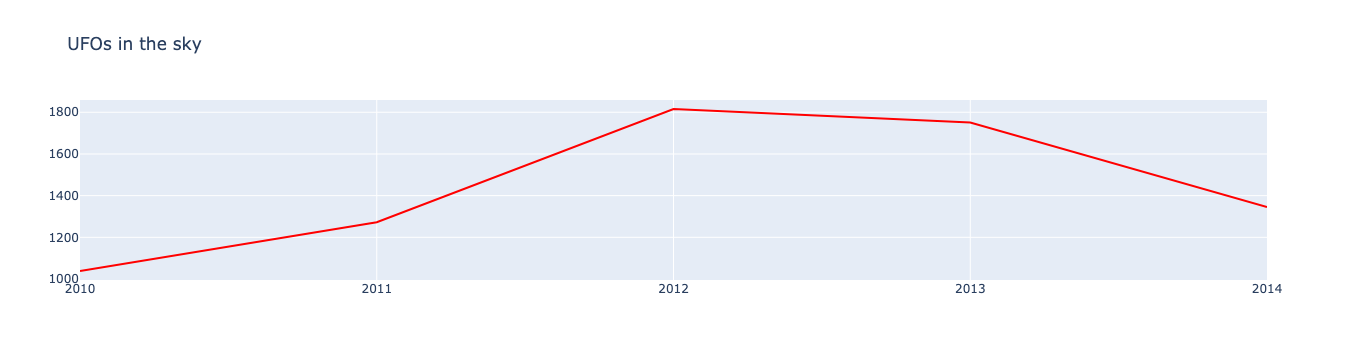

In [60]:

# Show the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

#### Timeline by shapes: Multiple

In [62]:
dates_df['color'].value_counts()

green     5
orange    5
other     5
red       5
Name: color, dtype: int64

In [61]:
# list of colors
input_colors = list(dates_df['color'].value_counts().index)
input_colors

['green', 'orange', 'other', 'red']

In [75]:
# use groupby to create the data
def make_colors_data(my_color):
    output = dates_df[dates_df['color']==my_color].groupby(['Year'])['sighting'].sum()
    return output

In [76]:
# try this function
my_color = 'green'
make_colors_data(my_color)

Year
2010     55
2011    130
2012    144
2013    116
2014    110
Name: sighting, dtype: int64

In [77]:
for my_color in input_colors:
    print(make_colors_data(my_color))

Year
2010     55
2011    130
2012    144
2013    116
2014    110
Name: sighting, dtype: int64
Year
2010     275
2011     461
2012     950
2013    1029
2014     736
Name: sighting, dtype: int64
Year
2010    3562
2011    4154
2012    5573
2013    5268
2014    4045
Name: sighting, dtype: int64
Year
2010    262
2011    344
2012    596
2013    590
2014    491
Name: sighting, dtype: int64


In [78]:
# apply the function to all colors

outputs = list(map(make_colors_data, input_colors))
outputs[1]

Year
2010     275
2011     461
2012     950
2013    1029
2014     736
Name: sighting, dtype: int64

In [79]:

output_colors = ['green', 'orange', 'blue', 'red']

# create a trace
traces={}
for x in range(0,4):
    traces[x] = go.Scatter(
        x = outputs[x].index.astype(str),
        y = outputs[x].values,
        mode =  'lines',
        marker = {'color': output_colors[x]},
        hovertemplate = 'People saw %{y} fireballs in the year %{x}',
        name = input_colors[x]
    )
# assign traces to data
data = [traces[0], traces[1], traces[2], traces[3]]
layout = go.Layout(
    title = 'shapes in the sky'
)


In [80]:
# it's just a dictionary!
data

[Scatter({
     'hovertemplate': 'People saw %{y} fireballs in the year %{x}',
     'marker': {'color': 'green'},
     'mode': 'lines',
     'name': 'green',
     'x': array(['2010', '2011', '2012', '2013', '2014'], dtype=object),
     'y': array([ 55, 130, 144, 116, 110])
 }),
 Scatter({
     'hovertemplate': 'People saw %{y} fireballs in the year %{x}',
     'marker': {'color': 'orange'},
     'mode': 'lines',
     'name': 'orange',
     'x': array(['2010', '2011', '2012', '2013', '2014'], dtype=object),
     'y': array([ 275,  461,  950, 1029,  736])
 }),
 Scatter({
     'hovertemplate': 'People saw %{y} fireballs in the year %{x}',
     'marker': {'color': 'blue'},
     'mode': 'lines',
     'name': 'other',
     'x': array(['2010', '2011', '2012', '2013', '2014'], dtype=object),
     'y': array([3562, 4154, 5573, 5268, 4045])
 }),
 Scatter({
     'hovertemplate': 'People saw %{y} fireballs in the year %{x}',
     'marker': {'color': 'red'},
     'mode': 'lines',
     'name': 'red'

In [81]:
# so is layout
layout

Layout({
    'title': {'text': 'shapes in the sky'}
})

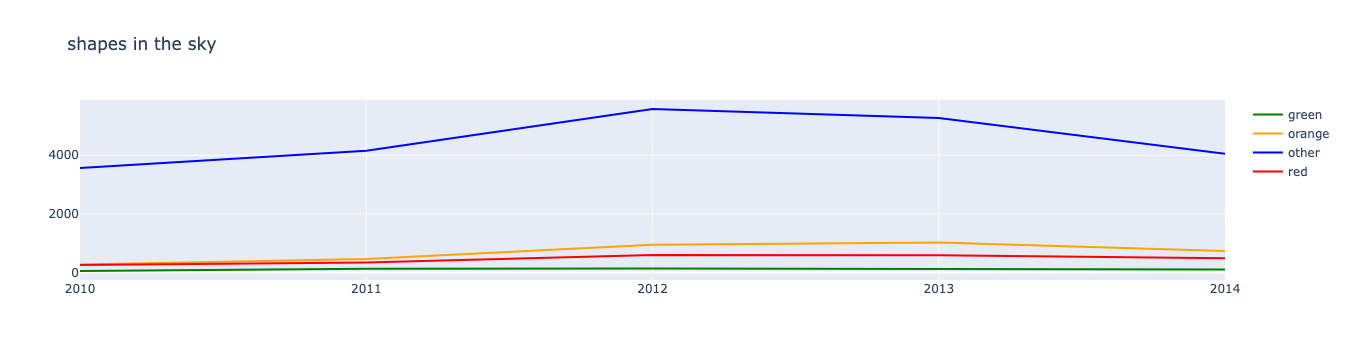

In [83]:

# Show the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

## More about Groupby 

In [85]:
dates_df

,Year,color,sighting
249,2010,green,55
250,2010,orange,275
251,2010,other,3562
252,2010,red,262
253,2011,green,130
254,2011,orange,461
255,2011,other,4154
256,2011,red,344
257,2012,green,144
258,2012,orange,950


In [97]:
dates_df[dates_df['color']=='green']

,Year,color,sighting
249,2010,green,55
253,2011,green,130
257,2012,green,144
261,2013,green,116
265,2014,green,110


In [98]:
# simple groupby
dates_df.groupby(['color']).sum()

,Year,sighting
color,,
green,10060,555
orange,10060,3451
other,10060,22602
red,10060,2283


In [99]:
# simple groupby
dates_df.groupby(['color']).mean()

,Year,sighting
color,,
green,2012.0,111.0
orange,2012.0,690.2
other,2012.0,4520.4
red,2012.0,456.6


In [ ]:
# use groupby to create the data
mean_year= dates_df.groupby(['Year'])['sighting'].mean()
mean_year